In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("musk_csv.csv")

In [3]:
data.tail(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,...,40,124,-14,-30,107,171,-44,-115,118,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


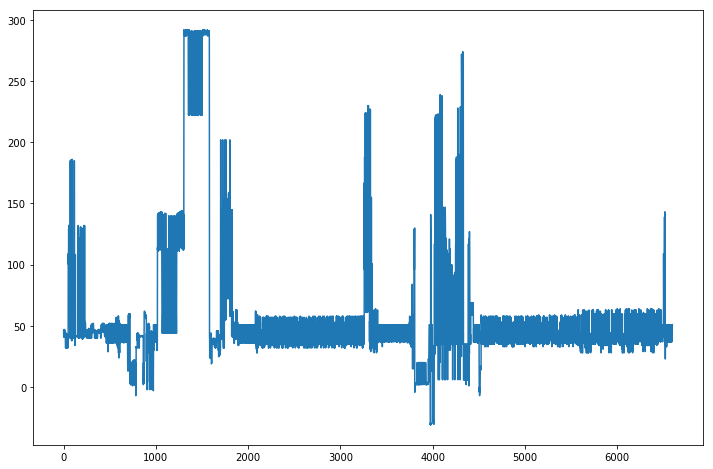

In [5]:
plt.figure(figsize = [12,8])
plt.plot(data['f1'])
# plt.plot(data['f2'])
# plt.plot(data['f3'])
# plt.plot(data['f4'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
data.shape

(6598, 170)

In [9]:
LABELS = data['class'].values

In [10]:
LABELS.shape

(6598,)

In [11]:
LABELS = LABELS.reshape(-1,1)

In [12]:
LABELS.shape

(6598, 1)

In [13]:
data.drop(['ID','molecule_name','conformation_name','class'],axis=1, inplace = True )

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 166 entries, f1 to f166
dtypes: int64(166)
memory usage: 8.4 MB


In [15]:
# min_max_scaler = MinMaxScaler()

In [16]:
# DATA = min_max_scaler.fit_transform(data.values)

In [17]:
# DATA.shape

In [18]:
# plt.figure(figsize=[12,8])
# plt.plot(data[:,0])

In [19]:
LABELS.reshape(len(LABELS),1)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [20]:
LABELS.shape

(6598, 1)

In [21]:
def initialize_parameters(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    for l in range(1,L):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) / np.sqrt(layers_dims[l-1])
        parameters['b'+str(l)] = np.zeros((layers_dims[l],1))
        
    return parameters
        

In [22]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == 'sigmoid':
        Z = W.dot(A_prev) + b
        A = 1/(1+np.exp(-Z))
    elif activation == 'tanh':
        Z = W.dot(A_prev) + b
        A = np.tanh(Z)
    
    Cache = (Z,A_prev,W,b)
    return A, Cache

In [23]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters)//2
    
    for l in range(1,L):
        A_prev = A
        A,cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], activation = 'tanh')
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], activation = 'sigmoid')
    caches.append(cache)
    
    return AL, caches

In [24]:
def compute_cost(AL,Y):
    m = Y.shape[1]
    cost = (1./m) * (-np.dot(Y, np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    return cost

In [25]:
def linear_activation_backward(dA, cache, activation):
    
    Z, A_prev,W,b = cache
#     print(A_prev,Z,W)
    m = A_prev.shape[1]
    if activation == 'sigmoid':
        s = 1/(1+np.exp(-Z))
        dZ = dA * s *(1-s)
        dW = 1./m * np.dot(dZ,A_prev.T)
        db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
        dA_prev = np.dot(W.T, dZ)
        
    elif activation == 'tanh':
        
        dZ = dA * (1-np.power(np.tanh(Z),2))
        dW = 1./m * (np.dot(dZ, A_prev.T))
        db = 1./m * (np.sum(dZ, axis=1, keepdims = True))
        dA_prev = np.dot(W.T, dZ)
        
    return dA_prev, dW, db

In [26]:
def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = -(np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    
    current_cache = caches[L-1]
    
    grads['dA'+str(L-1)], grads['dW'+str(L)], grads['db'+str(L)] = linear_activation_backward(dAL, current_cache, activation='sigmoid')
    
    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA'+str(l+1)], current_cache, activation = 'tanh')
        
        grads['dA'+str(l)] = dA_prev_temp
        grads['dW'+str(l+1)] = dW_temp
        grads['db'+str(l+1)] = db_temp
        
    return grads

In [27]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters)//2
    
    for l in range(L):
#         print(grads['dW'+str(l+1)])
        parameters['W'+str(l+1)] -= learning_rate * grads['dW'+str(l+1)]
        parameters['b'+str(l+1)] -= learning_rate * grads['db'+str(l+1)]
        
    return parameters


In [28]:
def predict(X, y, parameters):
    
    m = X.shape[1]
    n = len(parameters)//2
    p = np.zeros((1,m))
    
    probas, cache = L_model_forward(X, parameters)
    cost = compute_cost(probas,y)
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
        
#     print('Accuracy: '+ str(np.sum((p==y)/m)))
    accuracy = np.sum((p==y)/m)
    return cost,accuracy,p

In [29]:
def L_layer_model(X,Y,X_t,y_t,layers_dims, learning_rate = 0.1, num_iterations= 3000, print_cost=False):
    np.random.seed(1)
    costs_train = []
    costs_test = []
    accuracy_train = []
    accuracy_test = []
    parameters = initialize_parameters(layers_dims)
    
    for i in range (0, num_iterations):
        
        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i%100 == 0:
            m = X.shape[1]
            p = np.zeros((1,m))
#             print('Cost after iteration %i: %f' %(i, cost))
            for x in range(0, AL.shape[1]):
                if AL[0,x] > 0.5:
                    p[0,x] = 1
                else:
                    p[0,x] = 0
            acc_train = np.sum((p==Y)/m)
#             print('Accuracy after iteration %i: %f' %(i, acc_train))
            cost_test,acc_test,_ = predict(X_t,y_t,parameters)
            print('Iteration: %i || Train Cost: %f || Test Cost: %f || Train Accuracy: %f || Test Accuracy: %f' %(i,cost,cost_test,acc_train,acc_test))
            
            
        if print_cost and i%100 == 0:
            costs_train.append(cost)
            costs_test.append(cost_test)
            accuracy_train.append(acc_train)
            accuracy_test.append(acc_test)
    plt.figure()    
    plt.plot(np.squeeze(costs_train))
    plt.plot(np.squeeze(costs_test))
    plt.ylabel('Loss')
    plt.xlabel('iteration (per hundreds)')
    plt.legend(['train', 'test'])
    plt.title('Model Loss')
    plt.show()
    
    plt.figure()    
    plt.plot(accuracy_train)
    plt.plot(accuracy_test)
    plt.ylabel('Accuracy')
    plt.xlabel('iteration (per hundreds)')
    plt.legend(['train', 'test'])
    plt.title('Model Accuracy')
    plt.show()
        
    return parameters
        

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data, LABELS, test_size=0.2, random_state=42)

In [31]:
# y_train.reshape(-1,1)

In [32]:
y_train.shape

(5278, 1)

In [33]:
layers_dims = [166, 20, 1]

Iteration: 0 || Train Cost: 0.665189 || Test Cost: 0.481884 || Train Accuracy: 0.641341 || Test Accuracy: 0.837121
Iteration: 100 || Train Cost: 0.268176 || Test Cost: 0.273869 || Train Accuracy: 0.917393 || Test Accuracy: 0.887879
Iteration: 200 || Train Cost: 0.175598 || Test Cost: 0.192109 || Train Accuracy: 0.936718 || Test Accuracy: 0.944697
Iteration: 300 || Train Cost: 0.138605 || Test Cost: 0.147772 || Train Accuracy: 0.957749 || Test Accuracy: 0.951515
Iteration: 400 || Train Cost: 0.108314 || Test Cost: 0.118935 || Train Accuracy: 0.961538 || Test Accuracy: 0.956818
Iteration: 500 || Train Cost: 0.088835 || Test Cost: 0.113942 || Train Accuracy: 0.967222 || Test Accuracy: 0.960606
Iteration: 600 || Train Cost: 0.134454 || Test Cost: 0.131866 || Train Accuracy: 0.949792 || Test Accuracy: 0.954545
Iteration: 700 || Train Cost: 0.094806 || Test Cost: 0.120920 || Train Accuracy: 0.970443 || Test Accuracy: 0.960606
Iteration: 800 || Train Cost: 0.208582 || Test Cost: 0.191440 || T

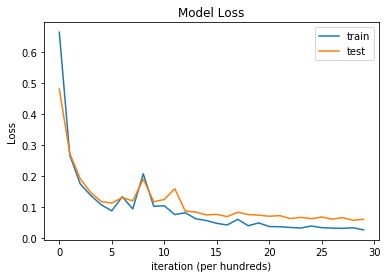

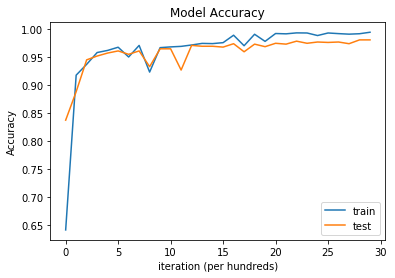

In [39]:
parameters = L_layer_model(X_train.T, y_train.T,X_test.T,y_test.T, layers_dims,learning_rate=0.1, num_iterations = 3000, print_cost=True)

In [40]:
_,accuracy,prediction = predict(X_test.T, y_test.T, parameters)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print("Accuracy: "+str(accuracy))

Accuracy: 0.9787878787878785


In [43]:
print(confusion_matrix(prediction.T, y_test))
print('\n')
print(classification_report(prediction.T, y_test))

[[1102   19]
 [   9  190]]


              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1121
         1.0       0.91      0.95      0.93       199

   micro avg       0.98      0.98      0.98      1320
   macro avg       0.95      0.97      0.96      1320
weighted avg       0.98      0.98      0.98      1320

